<a href="https://colab.research.google.com/github/LezhankinaAI/DiffEqProject2020/blob/main/Copy_of_Diffur_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sympy import *
import pandas as pd

In [ ]:
x = Symbol('x', Decimal=True)
y = Function('y')(x)
equation = input('Введите уравнение вида y\' = ')
x_0, y_0 = float(input('Введите значение x = ')), float(input('Введите значение y = '))

Введите уравнение вида y' = -2*x*y*y
Введите значение x = 0
Введите значение y = 1


In [ ]:
x = Symbol('x', real=True)
y = Function('y')(x)
equation = (sympify(equation)).subs({'x': x, 'y': y})
soln = dsolve(Eq(Derivative(y, x), equation), y, simplify=True)

# Метод Эйлера

In [ ]:
def exact_function(equation, soln, x0, y0, deltaX, n):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x0) - y0])
  soln = soln.subs(constant)
  X_func.append(x0)
  Y_func.append(y0)
  x0 += deltaX

  for i in range(n):
    exact = (soln.subs({x: x0}).args[1].n())
    X_func.append(x0)
    Y_func.append(exact)
    x0 += deltaX

In [ ]:
def euler(equation, soln, x0, y0, deltaX, n):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x0) - y0])
  soln = soln.subs(constant)

  Y_exact.append(y0)
  X_approx.append(x0)
  Y_approx.append(y0)
  Err_one.append(0)
  df = pd.DataFrame(columns = ["X value", "Approximation", "Exact", "Error(%)"])
  df.loc[0] = [x0, '{0:.6f}'.format(y0), '{0:.6f}'.format(y0), '{0:.6f}'.format(0)]

  y0 += float(equation.subs({x: x0, y: y0}) * deltaX)
  x0 += deltaX
  
  for i in range(n):
    exact = float(soln.subs({x: x0}).args[1].n())
    Y_exact.append(exact)
    X_approx.append(x0)
    Y_approx.append(y0)
    err = math.fabs((exact - y0)/exact*100)
    Err_one.append(err)
    df.loc[i + 1] = ['{0:.4f}'.format(x0), '{0:.6f}'.format(y0), '{0:.6f}'.format(exact), '{0:.6f}'.format(err)]
    increment = equation.subs({x: x0, y: y0}) * deltaX
    y0 += float(increment)
    x0 += deltaX

  print(df)

Euler's Method:
trying 6 steps and delta = 0.5
  X value Approximation     Exact   Error(%)
0       0      1.000000  1.000000   0.000000
1  0.5000      1.000000  0.800000  25.000000
2  1.0000      0.500000  0.500000   0.000000
3  1.5000      0.250000  0.307692  18.750000
4  2.0000      0.156250  0.200000  21.875000
5  2.5000      0.107422  0.137931  22.119141
6  3.0000      0.078573  0.100000  21.426773


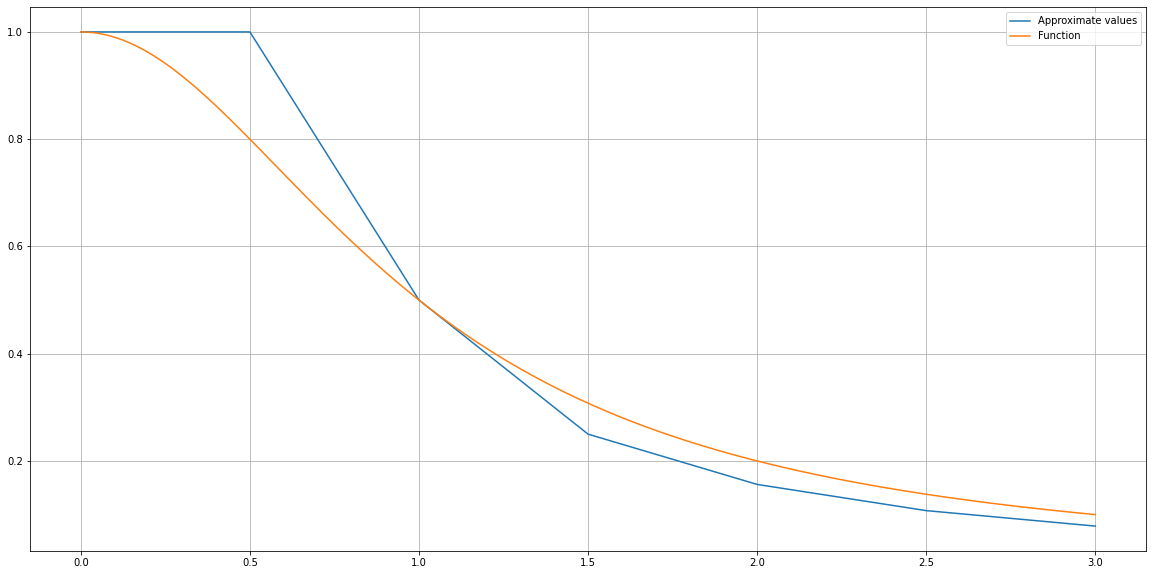

In [ ]:
print("Euler's Method:")
print("trying 6 steps and delta = 0.5")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_one = list()

euler(equation, soln, x_0, y_0, 0.5, 6)
Err_one_one = Err_one
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 30 steps and delta = 0.1
   X value Approximation     Exact  Error(%)
0        0      1.000000  1.000000  0.000000
1   0.1000      1.000000  0.990099  1.000000
2   0.2000      0.980000  0.961538  1.920000
3   0.3000      0.941584  0.917431  2.632656
4   0.4000      0.888389  0.862069  3.053144
5   0.5000      0.825250  0.800000  3.156294
6   0.6000      0.757147  0.735294  2.971929
7   0.7000      0.688354  0.671141  2.564750
8   0.8000      0.622018  0.609756  2.010895
9   0.9000      0.560113  0.552486  1.380398
10  1.0000      0.503642  0.500000  0.728395
11  1.1000      0.452911  0.452489  0.093315
12  1.2000      0.407783  0.409836  0.501021
13  1.3000      0.367874  0.371747  1.041925
14  1.4000      0.332688  0.337838  1.524419
15  1.5000      0.301697  0.307692  1.948459
16  1.6000      0.274391  0.280899  2.316905
17  1.7000      0.250298  0.257069  2.634143
18  1.8000      0.228997  0.235849  2.905200
19  1.9000      0.210119  0.216920  3.135198
20  2.0000      0.19334

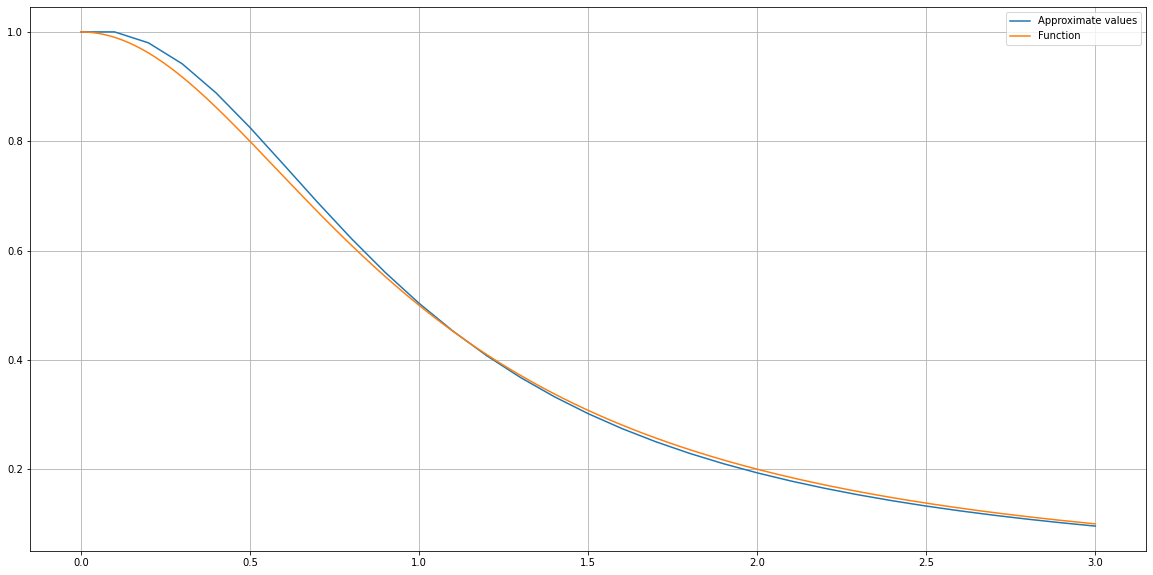

In [ ]:
print("trying 30 steps and delta = 0.1")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_one = list()

euler(equation, soln, x_0, y_0, 0.1, 30)
Err_one_two = Err_one
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 300 steps and delta = 0.01
    X value Approximation     Exact  Error(%)
0         0      1.000000  1.000000  0.000000
1    0.0100      1.000000  0.999900  0.010000
2    0.0200      0.999800  0.999600  0.019992
3    0.0300      0.999400  0.999101  0.029962
4    0.0400      0.998801  0.998403  0.039896
..      ...           ...       ...       ...
296  2.9600      0.102032  0.102442  0.400199
297  2.9700      0.101416  0.101824  0.400417
298  2.9800      0.100805  0.101210  0.400625
299  2.9900      0.100199  0.100603  0.400826
300  3.0000      0.099599  0.100000  0.401019

[301 rows x 4 columns]


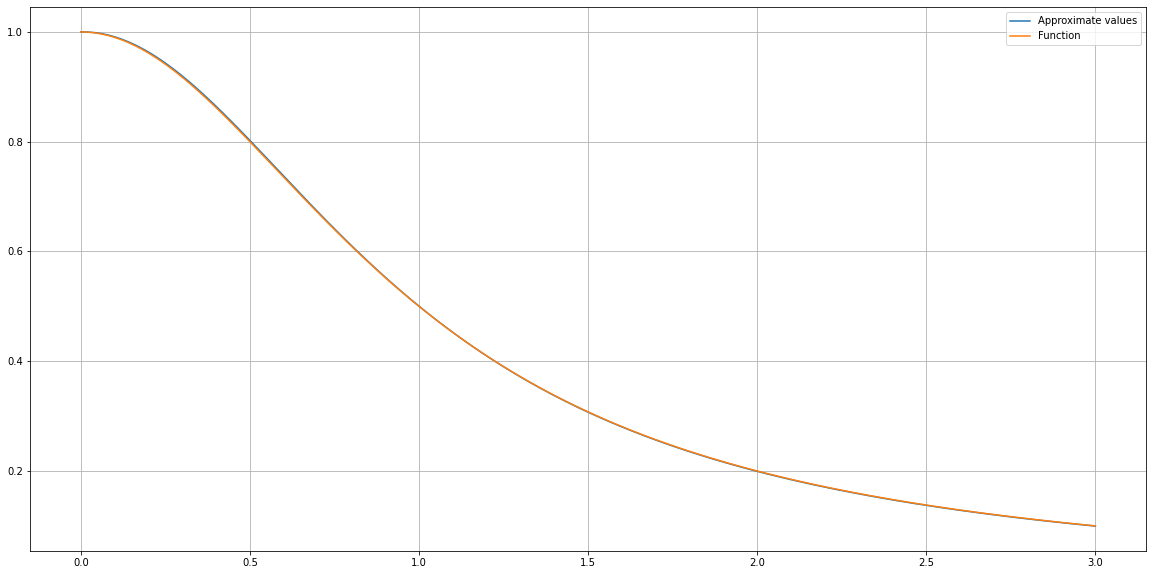

In [ ]:
print("trying 300 steps and delta = 0.01")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_one = list()

euler(equation, soln, x_0, y_0, 0.01, 300)
Err_one_three = Err_one
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

# Модифицированный метод Эйлера

In [ ]:
def modified_euler(equation, soln, x0, y0, deltaX, n):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x0) - y0])
  soln = soln.subs(constant)

  Y_exact.append(y0)
  X_approx.append(x0)
  Y_approx.append(y0)
  Err_two.append(0)
  df = pd.DataFrame(columns = ["X value", "Approximation", "Exact", "Error(%)"])
  df.loc[0] = ['{0:.4f}'.format(x0), '{0:.6f}'.format(y0), '{0:.6f}'.format(y0), '{0:.6f}'.format(0)]

  increment_1 = equation.subs({x: x0, y: y0}) * deltaX
  increment_2 = equation.subs({x: x0 + deltaX, y: y0 + increment_1}) * deltaX
  y0 += float((increment_1 + increment_2) / 2)
  x0 += deltaX 

  for i in range(n):
    exact = (soln.subs({x: x0}).args[1].n())
    Y_exact.append(exact)
    X_approx.append(x0)
    Y_approx.append(y0)
    err = math.fabs((exact - y0)/exact*100)
    Err_two.append(err)
    df.loc[i + 1] = ['{0:.4f}'.format(x0), '{0:.6f}'.format(y0), '{0:.6f}'.format(exact), '{0:.6f}'.format(err)]
    increment_1 = equation.subs({x: x0, y: y0}) * deltaX
    increment_2 = equation.subs({x: x0 + deltaX, y: y0 + increment_1}) * deltaX
    y0 += (increment_1 + increment_2) / 2
    x0 += deltaX

  print(df)

Modified Euler's Method:
trying 6 steps and delta = 0.5
  X value Approximation     Exact   Error(%)
0  0.0000      1.000000  1.000000   0.000000
1  0.5000      0.750000  0.800000   6.250000
2  1.0000      0.499512  0.500000   0.097656
3  1.5000      0.327881  0.307692   6.561270
4  2.0000      0.219489  0.200000   9.744268
5  2.5000      0.152360  0.137931  10.460694
6  3.0000      0.109997  0.100000   9.996693


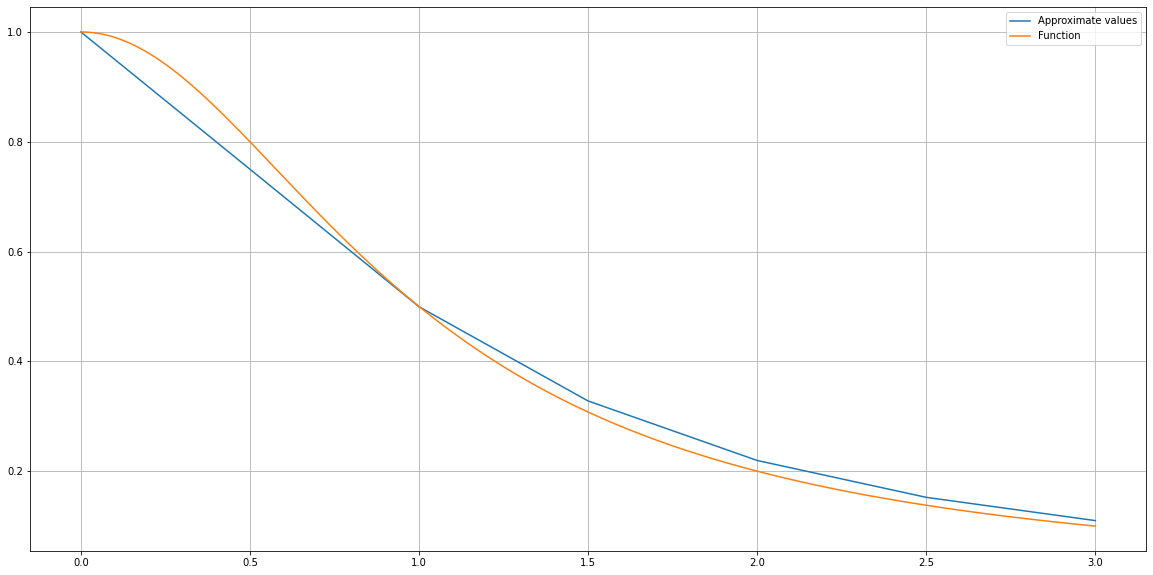

In [ ]:
print("Modified Euler's Method:")
print("trying 6 steps and delta = 0.5")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_two = list()

modified_euler(equation, soln, x_0, y_0, 0.5, 6)
Err_two_one = Err_two
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 30 steps and delta = 0.1
   X value Approximation     Exact  Error(%)
0   0.0000      1.000000  1.000000  0.000000
1   0.1000      0.990000  0.990099  0.010000
2   0.2000      0.961366  0.961538  0.017982
3   0.3000      0.917246  0.917431  0.020207
4   0.4000      0.861954  0.862069  0.013299
5   0.5000      0.800034  0.800000  0.004253
6   0.6000      0.735527  0.735294  0.031675
7   0.7000      0.671587  0.671141  0.066471
8   0.8000      0.610399  0.609756  0.105401
9   0.9000      0.553289  0.552486  0.145325
10  1.0000      0.500919  0.500000  0.183715
11  1.1000      0.453479  0.452489  0.218824
12  1.2000      0.410859  0.409836  0.249638
13  1.3000      0.372772  0.371747  0.275735
14  1.4000      0.338842  0.337838  0.297108
15  1.5000      0.308659  0.307692  0.314017
16  1.6000      0.281817  0.280899  0.326873
17  1.7000      0.257934  0.257069  0.336151
18  1.8000      0.236656  0.235849  0.342341
19  1.9000      0.217670  0.216920  0.345908
20  2.0000      0.20069

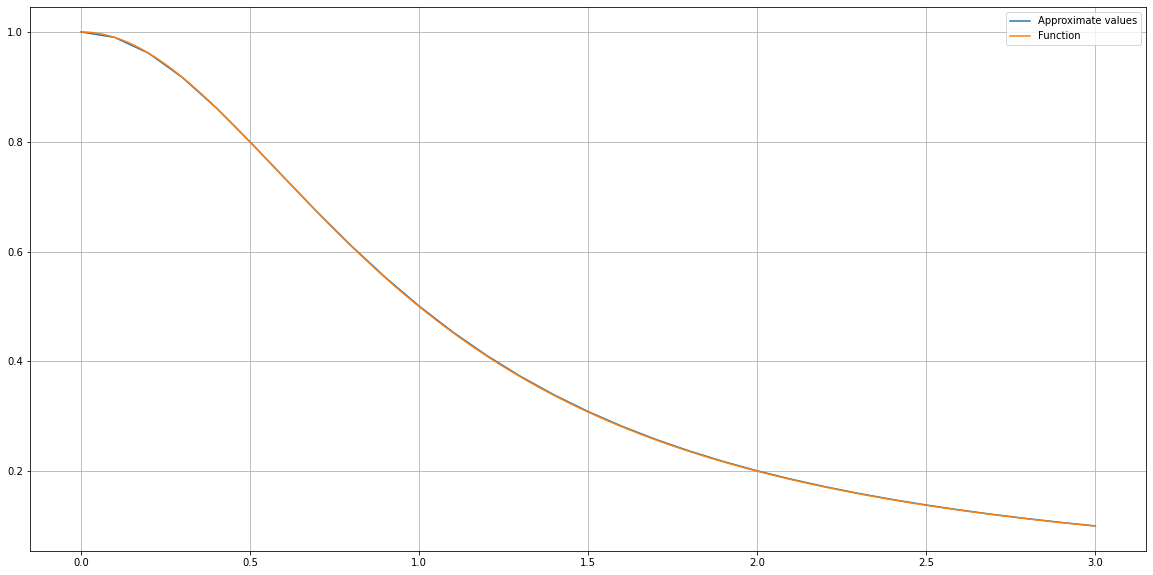

In [ ]:
print("trying 30 steps and delta = 0.1")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_two = list()

modified_euler(equation, soln, x_0, y_0, 0.1, 30)
Err_two_two = Err_two
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 300 steps and delta = 0.01
    X value Approximation     Exact  Error(%)
0    0.0000      1.000000  1.000000  0.000000
1    0.0100      0.999900  0.999900  0.000001
2    0.0200      0.999600  0.999600  0.000002
3    0.0300      0.999101  0.999101  0.000003
4    0.0400      0.998403  0.998403  0.000004
..      ...           ...       ...       ...
296  2.9600      0.102445  0.102442  0.002850
297  2.9700      0.101827  0.101824  0.002844
298  2.9800      0.101213  0.101210  0.002838
299  2.9900      0.100605  0.100603  0.002832
300  3.0000      0.100003  0.100000  0.002825

[301 rows x 4 columns]


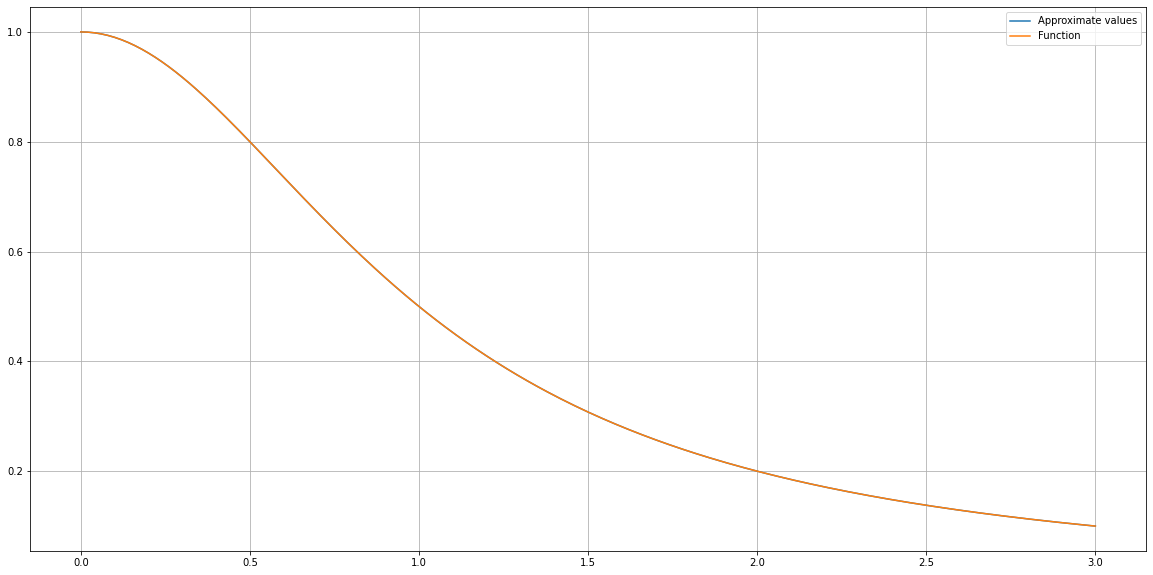

In [ ]:
print("trying 300 steps and delta = 0.01")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_two = list()

modified_euler(equation, soln, x_0, y_0, 0.01, 300)
Err_two_three = Err_two
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

# Улучшенный метод Эйлера

In [ ]:
def improved_euler(equation, soln, x0, y0, deltaX, n):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x0) - y0])
  soln = soln.subs(constant)

  Y_exact.append(y0)
  X_approx.append(x0)
  Y_approx.append(y0)
  Err_three.append(0)
  df = pd.DataFrame(columns = ["X value", "Approximation", "Exact", "Error(%)"])
  df.loc[0] = ['{0:.4f}'.format(x0), '{0:.6f}'.format(y0), '{0:.6f}'.format(y0), '{0:.6f}'.format(0)]

  increment_1 = equation.subs({x: x0, y: y0}) * deltaX
  increment_2 = equation.subs({x: x0 + deltaX / 2, y: y0 + increment_1 / 2}) * deltaX
  y0 += float(increment_2) 
  x0 += deltaX

  for i in range(n):
    exact = float(soln.subs({x: x0}).args[1].n())
    Y_exact.append(exact)
    X_approx.append(x0)
    Y_approx.append(y0)
    err = math.fabs((exact - y0)/exact*100)
    Err_three.append(err)
    df.loc[i+1] = ['{0:.4f}'.format(x0), '{0:.6f}'.format(y0), '{0:.6f}'.format(exact), '{0:.6f}'.format(err)]
    increment_1 = equation.subs({x: x0, y: y0}) * deltaX
    increment_2 = equation.subs({x: x0 + deltaX / 2, y: y0 + increment_1 / 2}) * deltaX
    y0 += increment_2
    x0 += deltaX

  print(df)

Improved Euler's Method:
trying 6 steps and delta = 0.5
  X value Approximation     Exact  Error(%)
0  0.0000      1.000000  1.000000  0.000000
1  0.5000      0.750000  0.800000  6.250000
2  1.0000      0.471497  0.500000  5.700684
3  1.5000      0.309189  0.307692  0.486287
4  2.0000      0.210486  0.200000  5.242811
5  2.5000      0.148349  0.137931  7.553042
6  3.0000      0.108193  0.100000  8.192861


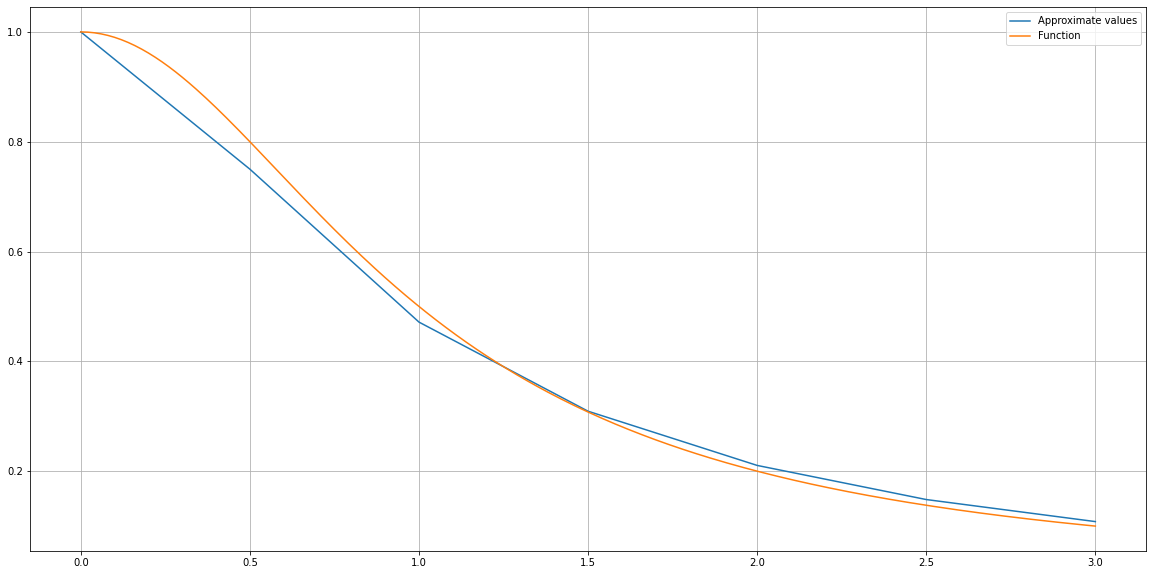

In [ ]:
print("Improved Euler's Method:")
print("trying 6 steps and delta = 0.5")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_three = list()

improved_euler(equation, soln, x_0, y_0, 0.5, 6)
Err_three_one = Err_three
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 30 steps and delta = 0.1
   X value Approximation     Exact  Error(%)
0   0.0000      1.000000  1.000000  0.000000
1   0.1000      0.990000  0.990099  0.010000
2   0.2000      0.961176  0.961538  0.037665
3   0.3000      0.916742  0.917431  0.075098
4   0.4000      0.861104  0.862069  0.111884
5   0.5000      0.798887  0.800000  0.139067
6   0.6000      0.734180  0.735294  0.151567
7   0.7000      0.670145  0.671141  0.148452
8   0.8000      0.608952  0.609756  0.131803
9   0.9000      0.551905  0.552486  0.105191
10  1.0000      0.499638  0.500000  0.072450
11  1.1000      0.452322  0.452489  0.036944
12  1.2000      0.409831  0.409836  0.001263
13  1.3000      0.371869  0.371747  0.032797
14  1.4000      0.338054  0.337838  0.064127
15  1.5000      0.307976  0.307692  0.092141
16  1.6000      0.281226  0.280899  0.116631
17  1.7000      0.257423  0.257069  0.137634
18  1.8000      0.236215  0.235849  0.155342
19  1.9000      0.217289  0.216920  0.170026
20  2.0000      0.20036

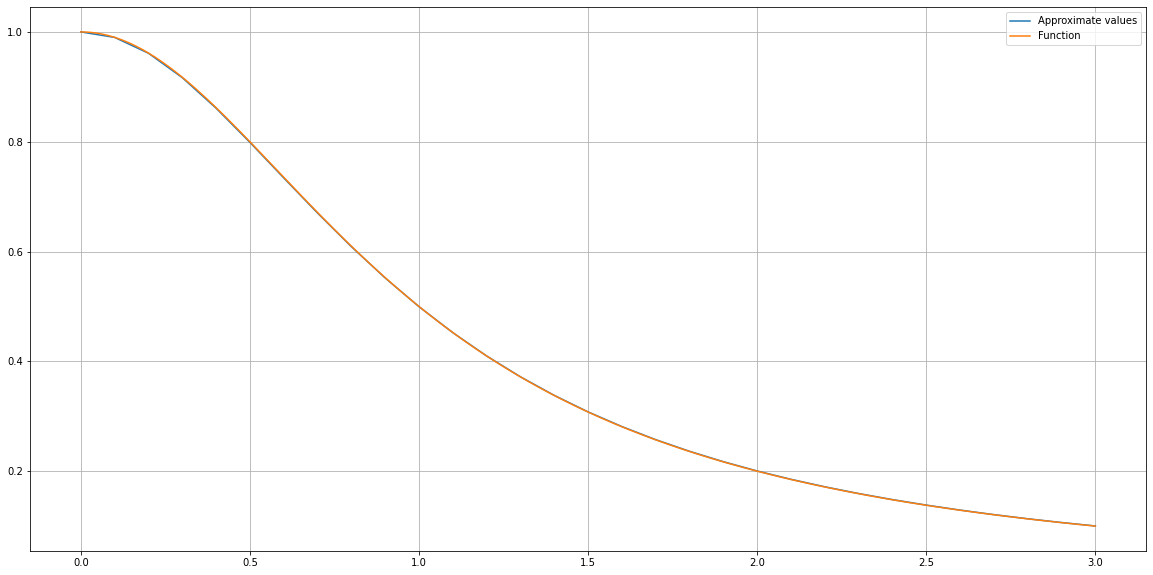

In [ ]:
print("trying 30 steps and delta = 0.1")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_three = list()

improved_euler(equation, soln, x_0, y_0, 0.1, 30)
Err_three_two = Err_three
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

trying 300 steps and delta = 0.01
    X value Approximation     Exact  Error(%)
0    0.0000      1.000000  1.000000  0.000000
1    0.0100      0.999900  0.999900  0.000001
2    0.0200      0.999600  0.999600  0.000004
3    0.0300      0.999101  0.999101  0.000009
4    0.0400      0.998402  0.998403  0.000016
..      ...           ...       ...       ...
296  2.9600      0.102444  0.102442  0.001930
297  2.9700      0.101826  0.101824  0.001929
298  2.9800      0.101212  0.101210  0.001927
299  2.9900      0.100605  0.100603  0.001926
300  3.0000      0.100002  0.100000  0.001925

[301 rows x 4 columns]


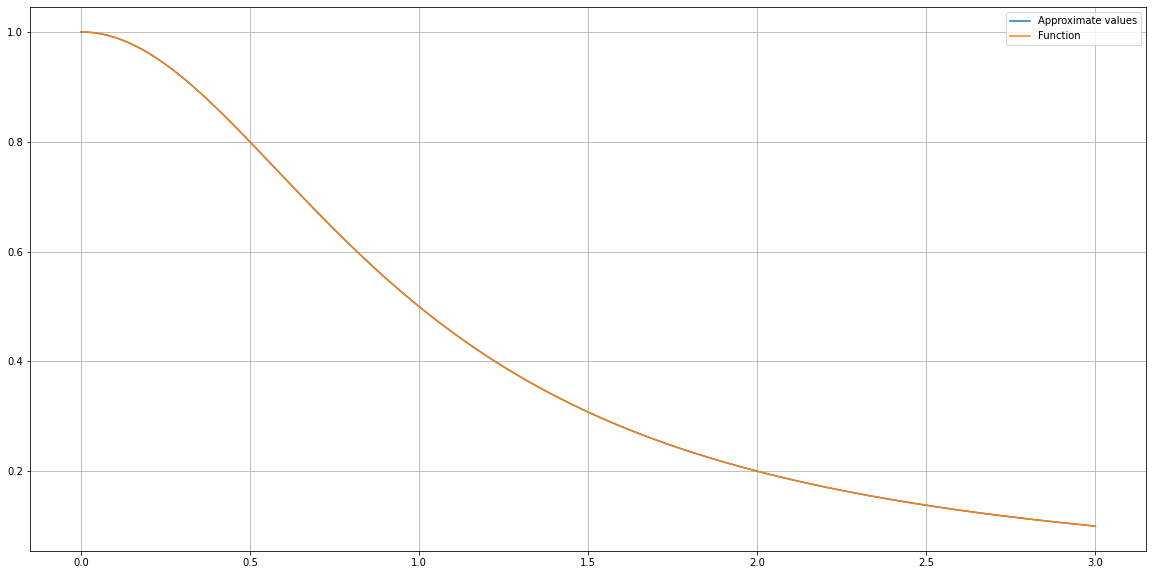

In [ ]:
print("trying 300 steps and delta = 0.01")
X_func = list()
Y_func = list()
Y_exact = list()
X_approx = list()
Y_approx = list()
Err_three = list()

improved_euler(equation, soln, x_0, y_0, 0.01, 300)
Err_three_three = Err_three
exact_function(equation, soln, x_0, y_0, 0.01, 300)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X_approx, Y_approx, label='Approximate values')
plt.plot(X_func, Y_func, label='Function')
plt.legend(); plt.show()

# Сравнение ошибок


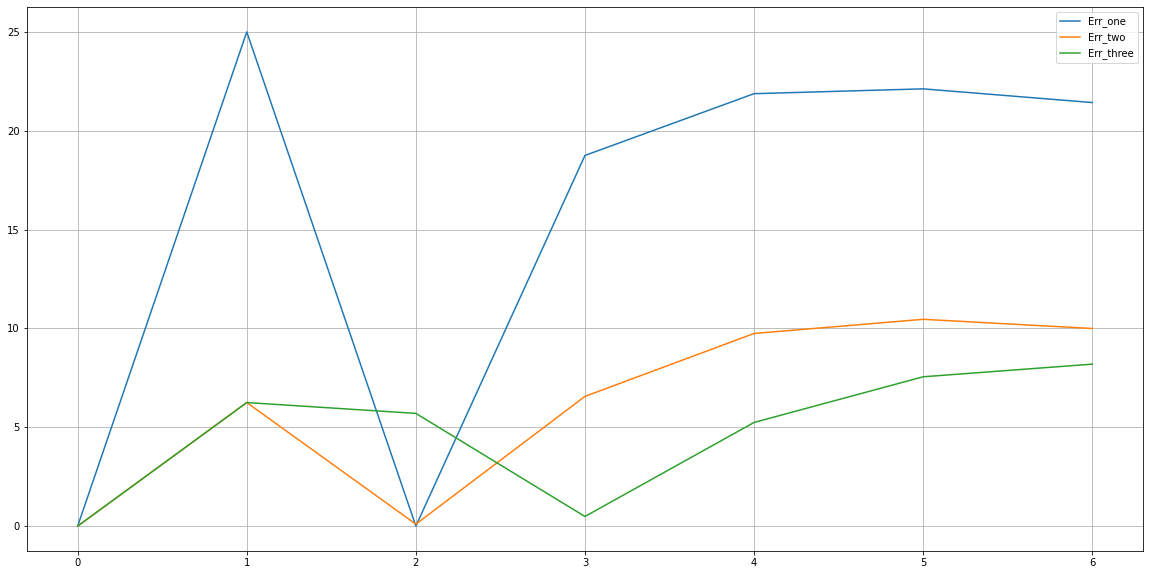

In [ ]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(Err_one_one, label='Err_one')
plt.plot(Err_two_one, label='Err_two')
plt.plot(Err_three_one, label='Err_three')
plt.legend(); plt.show()

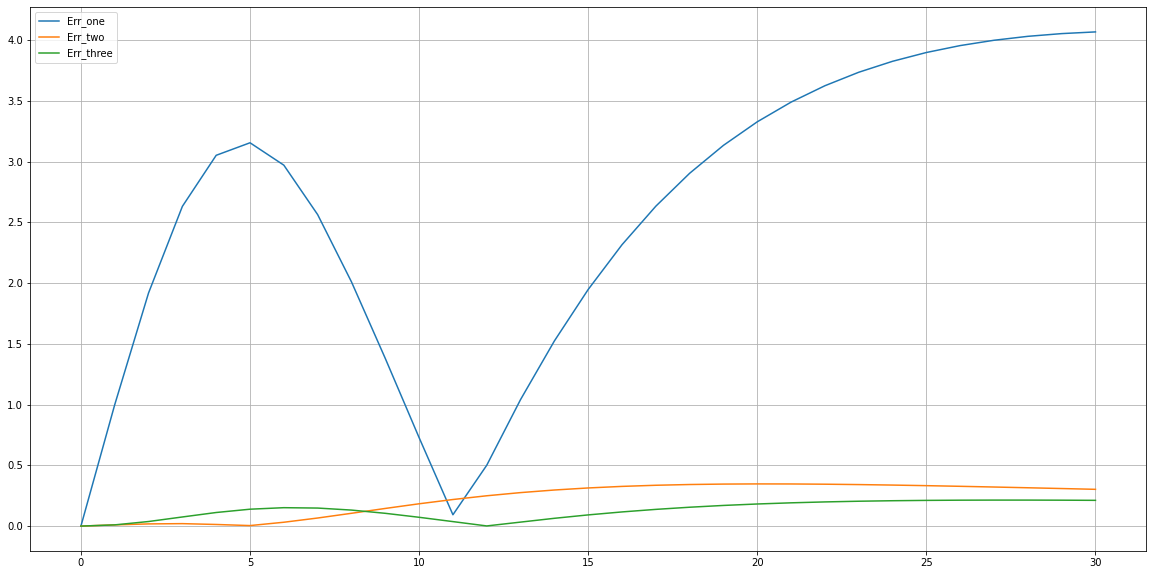

In [ ]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(Err_one_two, label='Err_one')
plt.plot(Err_two_two, label='Err_two')
plt.plot(Err_three_two, label='Err_three')
plt.legend(); plt.show()

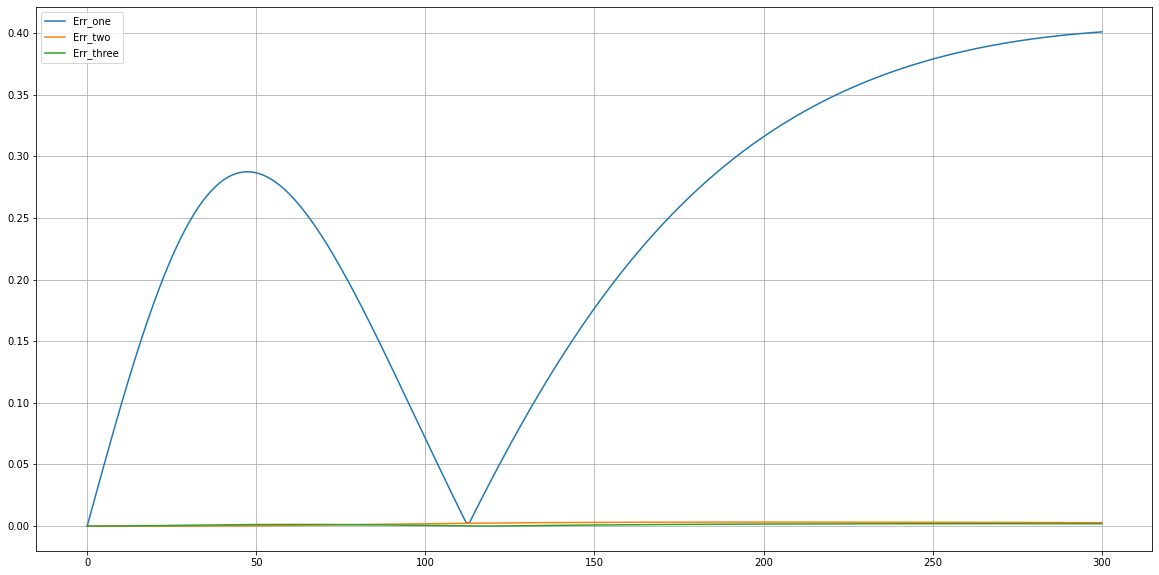

In [ ]:
plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(Err_one_three, label='Err_one')
plt.plot(Err_two_three, label='Err_two')
plt.plot(Err_three_three, label='Err_three')
plt.legend(); plt.show()

# Касательная

In [ ]:
def euler2(equation, soln, x01, x02, y0, deltaX1, deltaX2, n1, n2):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x01) - y0])
  soln = soln.subs(constant)

  X1_values.append(x01)
  Y_exact.append(y0)
  X2_values.append(x02)
  Y_approx.append(y0)

  y0 += equation.subs({x: x01, y: y0}) * deltaX2
  x01 += deltaX1
  x02 += deltaX2
  for i in range(n1):
    exact = float(soln.subs({x: x01}).args[1].n())
    X1_values.append(x01)
    Y_exact.append(exact)
    x01 += deltaX1
  for j in range(n2):
    X2_values.append(x02)
    Y_approx.append(y0)
    increment = equation.subs({x: x02, y: y0}) * deltaX2
    y0 += increment
    x02 += deltaX2


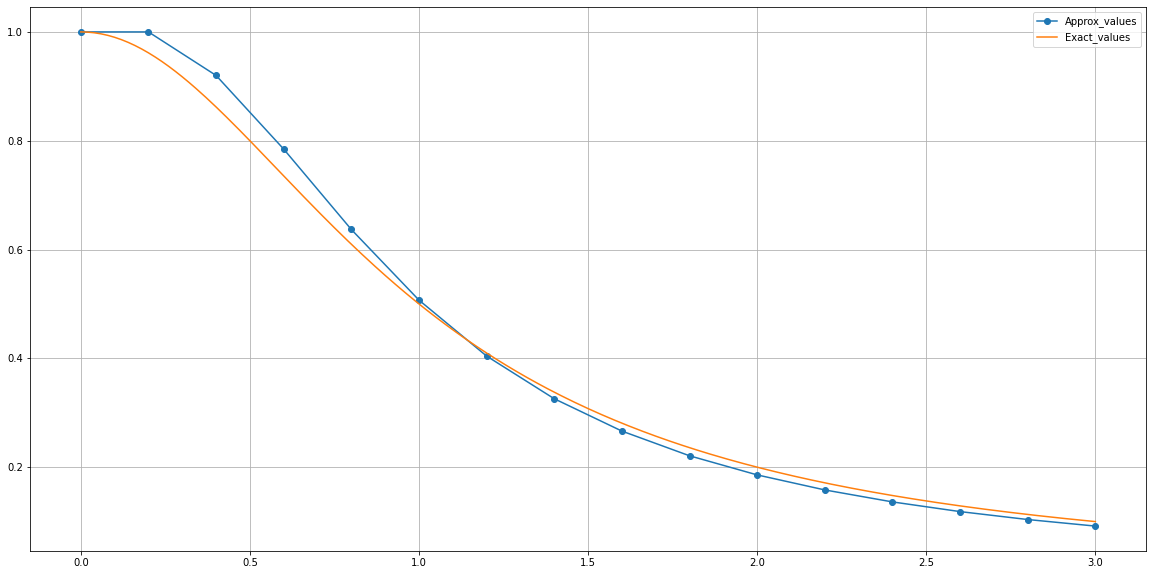

In [ ]:
X1_values = list()
X2_values = list()
Y_exact = list()
Y_approx = list()

euler2(equation, soln, x_0, x_0, y_0, 0.01, 0.2, 300, 15)

plt.figure(figsize=(20, 10))
plt.grid()
plt.plot(X2_values, Y_approx, 'o-', label='Approx_values')
plt.plot(X1_values, Y_exact, label='Exact_values')
plt.legend(); plt.show()

# Интегрирование 
Попробуем проверить, насколько метод Эйлера хорош для интегрирования различных функций. 

In [ ]:
# values for 1, 2 and 3 int
#exect_valye = log(125)
#exect_value = 625/16
#exec_value = -1

# Integrals
# int (3/x) dx from 1 to 11
# int (x^3 / 4) dx from 2 to 12 
# int (-sinx) dx from 0 to 1

# Будем находить первообразную от b, если F(a) != 0, вычитать эту константу

In [ ]:
x = Symbol('x', real=True)
y = Function('y')(x)
func = input('Введите уравнение вида f(x) = ')
x_0 = float(input('Введите значение a = '))
func = (sympify(func)).subs({'x': x, 'y': y})
y_0 = float((integrate(func, x)).subs({x: x_0}))

Введите уравнение вида f(x) = -sin(x)
Введите значение a = 10


In [ ]:
x = Symbol('x', real=True)
y = Function('y')(x)
func = (sympify(func)).subs({'x': x, 'y': y})
soln = dsolve(Eq(Derivative(y, x), func), y, simplify=True)

In [ ]:
def euler_int(func, soln, x0, y0, deltaX, n):
  x = Symbol('x', real=True)
  y = Function('y')(x)
  C1 = symbols('C1')
  constant = solve([soln.rhs.subs(x, x0) - y0])
  soln = soln.subs(constant)
  remember = 0
  if y0 != 0:
    remember = y0

  df = pd.DataFrame(columns = ["Approximation", "Exact", "Error(%)"])

  y0 += float(func.subs({x: x0, y: y0}) * deltaX)
  x0 += deltaX
  
  for i in range(n):
    exact = float(soln.subs({x: x0}).args[1].n())
    increment = func.subs({x: x0, y: y0}) * deltaX
    y0 += float(increment)
    x0 += deltaX

  if remember != 0:
    y0 -= remember
    exact -= remember
  
  err = math.fabs((exact - y0)/exact*100)
  df.loc[1] = ['{0:.6f}'.format(y0), '{0:.6f}'.format(exact), '{0:.6f}'.format(err)]
  print(df)

In [ ]:
euler_int(func, soln, x_0, y_0, 0.5, 20)

  Approximation     Exact  Error(%)
1      1.128831  1.247154  9.487389


In [ ]:
euler_int(func, soln, x_0, y_0, 0.25, 40)

  Approximation     Exact  Error(%)
1      1.194536  1.247154  4.219038


In [ ]:
euler_int(func, soln, x_0, y_0, 0.1, 100)

  Approximation     Exact  Error(%)
1      1.227668  1.247154  1.562412


In [ ]:
euler_int(func, soln, x_0, y_0, 0.01, 1000)

  Approximation     Exact  Error(%)
1      1.245299  1.247154  0.148740
